# 3. Feature Engineering and Modeling

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

In [30]:
# Load Data
cleaned = pd.read_csv('Cleaned.csv')[['text']].values.ravel()#This set was added in much later and is a little cleaner
tweets = pd.read_csv('CleanedDisasterTweets.csv')[['Text']].values.ravel()
target = pd.read_csv('TargetDisasterTweets.csv')[['target']].values.ravel()

# Train and Test sets
tweets_train, tweets_test, target_train, target_test = train_test_split(tweets, target, random_state = 0)
cleaned_train, cleaned_test, target_train, target_test = train_test_split(cleaned, target, random_state = 0)

# CountVectorizer unigram Train features

In [3]:
cv_uni = CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (1,1))
cv_uni_train =cv_uni.fit_transform(tweets_train)
df_cv_train = pd.DataFrame(cv_uni_train.toarray(), columns=cv_uni.get_feature_names())
df_cv_train.head()

,aa,aaaa,aaaaaaallll,aaarrrgghhh,aaemiddleaged,aampb,aampw,aashiqui,ab,aba,...,zonewolf,zoom,zotar,zouma,zourryart,zss,zumiez,zurich,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TfidfVectorizer unigram Train features

In [4]:
tfid_uni = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (1,1))
tfid_uni_train = tfid_uni.fit_transform(tweets_train)
df_tfid_train = pd.DataFrame.sparse.from_spmatrix(tfid_uni_train, columns = tfid_uni.get_feature_names())
df_tfid_train.head()

,aa,aaaa,aaaaaaallll,aaarrrgghhh,aaemiddleaged,aampb,aampw,aashiqui,ab,aba,...,zonewolf,zoom,zotar,zouma,zourryart,zss,zumiez,zurich,zxathetis,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Uni Test features

In [5]:
cv_uni_test = cv_uni.transform(tweets_test)
tfid_uni_test = tfid_uni.transform(tweets_test)

In [6]:
print('CountVectorizer Train features shape:', cv_uni_train.shape, '| TfidVectorizer Train features shape:', tfid_uni_train.shape, 
      '\nCountVectorizer Test features shape: ', cv_uni_test.shape, '| TfidVectorizer Test features shape: ', tfid_uni_test.shape)

CountVectorizer Train features shape: (5627, 17778) | TfidVectorizer Train features shape: (5627, 17778) 
CountVectorizer Test features shape:  (1876, 17778) | TfidVectorizer Test features shape:  (1876, 17778)


# Bi features

In [7]:
# CountVectorizer bigram features
cv_bi =CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (2,2))
cv_bi_train =cv_bi.fit_transform(tweets_train)
cv_bi_test = cv_bi.transform(tweets_test)

# TfidfVectorizer bigram features
tfid_bi = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (2,2))
tfid_bi_train = tfid_bi.fit_transform(tweets_train)
tfid_bi_test = tfid_bi.transform(tweets_test)

print('CountVectorizer Train features shape:', cv_bi_train.shape, '| TfidVectorizer Train features shape:', tfid_bi_train.shape, 
      '\nCountVectorizer Test features shape: ', cv_bi_test.shape, '| TfidVectorizer Test features shape: ', tfid_bi_test.shape)

CountVectorizer Train features shape: (5627, 42035) | TfidVectorizer Train features shape: (5627, 42035) 
CountVectorizer Test features shape:  (1876, 42035) | TfidVectorizer Test features shape:  (1876, 42035)


# Uni and Bi features

In [8]:
# CountVectorizer Uni and Bi features
cv_uni_bi = CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (1,2))
cv_uni_bi_train = cv_uni_bi.fit_transform(tweets_train)
cv_uni_bi_test = cv_uni_bi.transform(tweets_test)

# TfidVectorizer Uni and Bi features
tfid_uni_bi = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (1,2))
tfid_uni_bi_train = tfid_uni_bi.fit_transform(tweets_train)
tfid_uni_bi_test = tfid_uni_bi.transform(tweets_test)

print('CountVectorizer Train features shape:', cv_uni_bi_train.shape, '| TfidVectorizer Train features shape:', tfid_uni_bi_train.shape, 
      '\nCountVectorizer Test features shape: ', cv_uni_bi_test.shape, '| TfidVectorizer Test features shape: ', tfid_uni_bi_test.shape)

CountVectorizer Train features shape: (5627, 59813) | TfidVectorizer Train features shape: (5627, 59813) 
CountVectorizer Test features shape:  (1876, 59813) | TfidVectorizer Test features shape:  (1876, 59813)


# Full GridSearchCV 

In [9]:
# steps = [('cv', CountVectorizer()), 
#          ('log', LogisticRegression(random_state = 0))]

# pipe = Pipeline(steps)

# params = {'cv__strip_accents':['ascii', 'unicode'],
#           'cv__ngram_range':[(1,1), (1,2)],
#           'log__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#           'log__C':np.logspace(-2, 2, 50)}

# gs = GridSearchCV(pipe, params, cv=5).fit(tweets_train, target_train)
# gs.best_params_
# best_logreg_c = gs.best_params_['log__C']
# best_logreg_score = gs.best_score_

# print('Best C param:', best_logreg_c, '\nBest score:', best_logreg_score)

# output for best_params_: 'ascii', (1,1), 'saga', 0.20235896477251566, 

# LogisticRegression with CountVectorizer features 

In [10]:
# Uni features, liblinear
max_c = 0.20235896477251566
log = LogisticRegression(solver = 'liblinear', C = max_c, random_state = 0)
log.fit(cv_uni_train, target_train)
log_cv_uni_prediction = log.predict(cv_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.79      0.90      0.84      1092
Disaster Tweet       0.83      0.66      0.74       784

      accuracy                           0.80      1876
     macro avg       0.81      0.78      0.79      1876
  weighted avg       0.81      0.80      0.80      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,987,105
Disaster Tweet,265,519


In [11]:
# Uni features, saga
log_saga = LogisticRegression(solver = 'saga', C = max_c, random_state = 0)
log_saga.fit(cv_uni_train, target_train)
log_cv_uni_saga_prediction = log_saga.predict(cv_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_saga_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_saga_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.79      0.90      0.84      1092
Disaster Tweet       0.83      0.66      0.74       784

      accuracy                           0.80      1876
     macro avg       0.81      0.78      0.79      1876
  weighted avg       0.81      0.80      0.80      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,985,107
Disaster Tweet,263,521


In [33]:
# uni, lbfgs, 
log_lbfgs = LogisticRegression(solver = 'lbfgs', C = max_c, random_state = 0)
log_lbfgs.fit(cv_uni_train, target_train)
log_cv_uni_lbfgs_prediction = log_lbfgs.predict(cv_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_lbfgs_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.79      0.90      0.84      1092
Disaster Tweet       0.83      0.66      0.74       784

      accuracy                           0.80      1876
     macro avg       0.81      0.78      0.79      1876
  weighted avg       0.81      0.80      0.80      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,987,105
Disaster Tweet,265,519


# Cleaned Data

In [29]:
# CountVectorizer Uni and Bi features on Cleaned Set
cv_uni_bi = CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (1,2))
cv_clean_uni_bi_train = cv_uni_bi.fit_transform(cleaned_train)
cv_clean_uni_bi_test = cv_uni_bi.transform(cleaned_test)

# TfidVectorizer Uni and Bi features on Cleaned Set
tfid_uni_bi = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (1,2))
tfid_clean_uni_bi_train = tfid_uni_bi.fit_transform(cleaned_train)
tfid_clean_uni_bi_test = tfid_uni_bi.transform(cleaned_test)

# print('CountVectorizer Train features shape:', cv_uni_bi_train.shape, '| TfidVectorizer Train features shape:', tfid_uni_bi_train.shape, 
#       '\nCountVectorizer Test features shape: ', cv_uni_bi_test.shape, '| TfidVectorizer Test features shape: ', tfid_uni_bi_test.shape)

In [32]:
# uni, lbfgs, 
log_lbfgs = LogisticRegression(solver = 'lbfgs', C = max_c, random_state = 0)
log_lbfgs.fit(cv_clean_uni_bi_train, target_train)
log_cv_uni_lbfgs_prediction = log_lbfgs.predict(cv_clean_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_lbfgs_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.79      0.91      0.84      1092
Disaster Tweet       0.84      0.66      0.74       784

      accuracy                           0.80      1876
     macro avg       0.81      0.78      0.79      1876
  weighted avg       0.81      0.80      0.80      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,990,102
Disaster Tweet,265,519


In [53]:
log = LogisticRegression(solver = 'saga', C = max_c, random_state = 0)
params = {'max_iter':list(range(10, 1000))}

gs = GridSearchCV(log, params, cv=5).fit(cv_uni_bi_train, target_train)
gs.best_params_

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

{'max_iter': 10}

In [52]:
# LogReg, uni and bi, saga 
log = LogisticRegression(solver = 'saga', C = max_c, random_state = 0, max_iter = 10)
log.fit(cv_clean_uni_bi_train, target_train)
log_cv_uni_lbfgs_prediction = log_lbfgs.predict(cv_clean_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_lbfgs_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.79      0.90      0.84      1092
Disaster Tweet       0.82      0.67      0.74       784

      accuracy                           0.80      1876
     macro avg       0.81      0.79      0.79      1876
  weighted avg       0.81      0.80      0.80      1876



C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Safe Tweet,Disaster Tweet
Safe Tweet,979,113
Disaster Tweet,255,529


The cleaner data set marginally increased detection of Safe Tweets but had zero impact on the detection of Disaster Tweets. This Model

In [13]:
# Uni and Bi features
log = LogisticRegression(solver = 'liblinear', C = max_c, random_state = 0).fit(cv_uni_bi_train, target_train)
log_cv_uni_bi_prediction = log.predict(cv_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_bi_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_bi_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.78      0.92      0.84      1092
Disaster Tweet       0.85      0.64      0.73       784

      accuracy                           0.80      1876
     macro avg       0.82      0.78      0.79      1876
  weighted avg       0.81      0.80      0.80      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1007,85
Disaster Tweet,286,498


In [14]:
# Bi features
log = LogisticRegression(solver = 'liblinear', C = max_c, random_state = 0)
log.fit(cv_bi_train, target_train)
log_cv_bi_prediction = log.predict(cv_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_bi_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_cv_bi_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.68      0.98      0.80      1092
Disaster Tweet       0.92      0.36      0.52       784

      accuracy                           0.72      1876
     macro avg       0.80      0.67      0.66      1876
  weighted avg       0.78      0.72      0.69      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1067,25
Disaster Tweet,499,285


Only vectorizing bigrams clearly is the worst set of features among the three given the detection of Disaster Tweets is the lowest with an F1 score of 0.52 

# LogisticRegression with TfidVectorizer features

In [15]:
# Uni features
log = LogisticRegression(solver = 'liblinear', C = max_c, random_state = 0).fit(tfid_uni_train, target_train)
log_tfid_uni_prediction = log.predict(tfid_uni_test)

labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_tfid_uni_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_tfid_uni_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.72      0.97      0.83      1092
Disaster Tweet       0.91      0.49      0.63       784

      accuracy                           0.76      1876
     macro avg       0.82      0.73      0.73      1876
  weighted avg       0.80      0.76      0.75      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1054,38
Disaster Tweet,403,381


In [16]:
# Uni and Bi
log = LogisticRegression(solver = 'liblinear', C = max_c, random_state = 0)

log.fit(tfid_uni_bi_train, target_train)
log_tfid_uni_bi_prediction = log.predict(tfid_uni_bi_test)

labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_tfid_uni_bi_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_tfid_uni_bi_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.70      0.98      0.82      1092
Disaster Tweet       0.95      0.40      0.56       784

      accuracy                           0.74      1876
     macro avg       0.82      0.69      0.69      1876
  weighted avg       0.80      0.74      0.71      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1075,17
Disaster Tweet,470,314


In [17]:
# Bi features
log = LogisticRegression(solver = 'liblinear', C = max_c, random_state = 0)
log.fit(tfid_bi_train, target_train)
log_tfid_bi_prediction = log.predict(tfid_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_tfid_bi_prediction, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, log_tfid_bi_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.63      1.00      0.77      1092
Disaster Tweet       0.98      0.18      0.31       784

      accuracy                           0.66      1876
     macro avg       0.80      0.59      0.54      1876
  weighted avg       0.78      0.66      0.58      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1089,3
Disaster Tweet,641,143


CountVectorizer outperformed Tfid features using LogisticRegression

# RandomForest 

In [18]:
# steps = [('cv', CountVectorizer(strip_accents = 'ascii', ngram_range=(1,2))), 
#          ('rf', RandomForestClassifier(n_jobs = -1, random_state = 0))]

# pipe = Pipeline(steps)

# params = {'rf__n_estimators':list(range(100, 201))}

# gs = GridSearchCV(pipe, params, cv=5).fit(tweets_train, target_train)

# best results: n_estimators = 193

In [27]:
# rf = RandomForestClassifier(n_jobs = -1, random_state = 0)

# params = {'n_estimators':list(range(186, 201))}

# gs = GridSearchCV(rf, params, cv=5).fit(cv_uni_train, target_train)
# gs.best_params_

# best_params_: n_estimators = 199

In [20]:
# CountVectorizer uni features
rf = RandomForestClassifier(n_estimators = 199, n_jobs = -1, random_state = 0).fit(cv_uni_train, target_train)
rf_predict = rf.predict(cv_uni_test)

labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, rf_predict, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, rf_predict), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.78      0.90      0.84      1092
Disaster Tweet       0.83      0.64      0.72       784

      accuracy                           0.79      1876
     macro avg       0.80      0.77      0.78      1876
  weighted avg       0.80      0.79      0.79      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,987,105
Disaster Tweet,280,504


In [21]:
# CountVectorizer uni and bi features
rf = RandomForestClassifier(n_estimators = 199, n_jobs = -1, random_state = 0).fit(cv_uni_bi_train, target_train)
rf_predict = rf.predict(cv_uni_bi_test)

labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, rf_predict, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, rf_predict), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.76      0.93      0.83      1092
Disaster Tweet       0.86      0.58      0.69       784

      accuracy                           0.78      1876
     macro avg       0.81      0.76      0.76      1876
  weighted avg       0.80      0.78      0.78      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1017,75
Disaster Tweet,329,455


In [40]:
# TfidVectorizer uni features
rf = RandomForestClassifier(n_estimators = 199, n_jobs = -1, random_state = 0).fit(tfid_uni_train, target_train)
rf_predict = rf.predict(tfid_uni_test)

labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, rf_predict, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, rf_predict), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.80      0.87      0.83      1092
Disaster Tweet       0.79      0.69      0.74       784

      accuracy                           0.80      1876
     macro avg       0.79      0.78      0.79      1876
  weighted avg       0.80      0.80      0.79      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,950,142
Disaster Tweet,242,542


This model did that best at detecting Disaster Tweets

In [39]:
# TfidVectorizer uni and bi features
rf = RandomForestClassifier(n_estimators = 199, n_jobs = -1, random_state = 0).fit(tfid_uni_bi_train, target_train)
rf_predict = rf.predict(tfid_uni_bi_test)

labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, rf_predict, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, rf_predict), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.79      0.88      0.83      1092
Disaster Tweet       0.81      0.67      0.73       784

      accuracy                           0.80      1876
     macro avg       0.80      0.78      0.78      1876
  weighted avg       0.80      0.80      0.79      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,965,127
Disaster Tweet,256,528


# Support Vector Machine  

In [25]:
sv = SVC(random_state = 0)
# params = {'C':np.logspace(-2,2,50)}

# svm = GridSearchCV(sv, params, cv = 5)
sv.fit(cv_uni_train, target_train)

sv_pred = sv.predict(cv_uni_test)

labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, sv_pred, target_names = labels))
pd.DataFrame(confusion_matrix(target_test, sv_pred), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet       0.77      0.93      0.84      1092
Disaster Tweet       0.86      0.62      0.72       784

      accuracy                           0.80      1876
     macro avg       0.82      0.78      0.78      1876
  weighted avg       0.81      0.80      0.79      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1015,77
Disaster Tweet,296,488


In [34]:
# svm.best_params_
# output: 'C' = 1.93

# Data Quantity Assessment

In [37]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(LogisticRegression(), cv_uni_bi_train, target_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

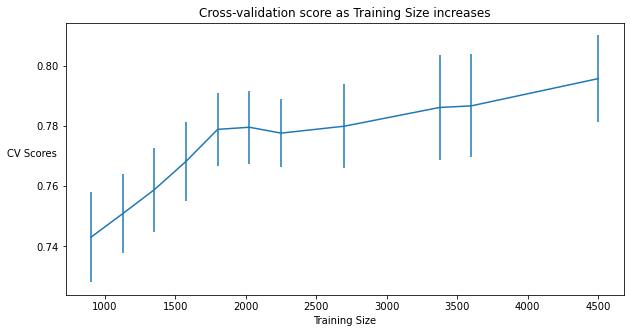

In [46]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training Size')
plt.ylabel('CV Scores', rotation = 0)
plt.title('Cross-validation score as Training Size increases');

The gradual increase in score implies that more data could be beneficial but considering the score increased by about only 2% from around 2000 to 4500 entries, an additional 2500 entries will almost certainly give less than a 2% increase.  